<a href="https://colab.research.google.com/github/TinkerTechie/Gen-Ai-/blob/main/titanicInsight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import pandas as pd

In [59]:
df = pd.read_csv("Titanic-Dataset.csv")

In [60]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
df['Survived'].unique

<bound method Series.unique of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64>

In [63]:
df["Age"].isna().sum()/len(df["Age"])

np.float64(0.19865319865319866)

In [64]:
df["Cabin"].isna().sum()/len(df["Cabin"])

np.float64(0.7710437710437711)

In [65]:
df1 = df.copy()

In [66]:
df1['Age'] = df1['Age'].fillna(df1['Age'].median())

In [67]:
df1 = df1.drop(columns="Cabin", errors='ignore')

In [68]:
df1['Embarked']= df1['Embarked'].fillna(df['Embarked'].mode()[0])

In [69]:
df1.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [70]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [71]:
df1.drop(columns=['Name','PassengerId','Ticket'] , inplace=True)

In [72]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [73]:
df1.size

7128

In [74]:
df1.select_dtypes(include='object').columns

Index(['Sex', 'Embarked'], dtype='object')

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
le = LabelEncoder()
df1['Sex'] = le.fit_transform(df1['Sex'])
df1['Embarked'] = le.fit_transform(df1['Embarked'])

In [77]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [78]:
x = df1.drop(columns='Survived')
y = df1['Survived']

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [80]:
df1.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [88]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
clf = DecisionTreeClassifier(max_depth=10,criterion='gini')
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [82]:
from sklearn.metrics import accuracy_score

In [89]:
y_pred = clf.predict(X_train)
print(accuracy_score(y_train,y_pred))

0.9143258426966292


In [93]:
y_pred2 = clf.predict(X_test)
print(accuracy_score(y_test,y_pred2))

# Calculate feature importances
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': clf.feature_importances_
}).sort_values(by='importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

0.8100558659217877

Feature Importances:
    feature  importance
1       Sex    0.401502
5      Fare    0.203999
2       Age    0.155761
0    Pclass    0.142980
3     SibSp    0.055461
4     Parch    0.025650
6  Embarked    0.014647


In [91]:
from sklearn.metrics import r2_score

In [92]:
r2_score(y_test,y_pred2)

0.2167310167310167

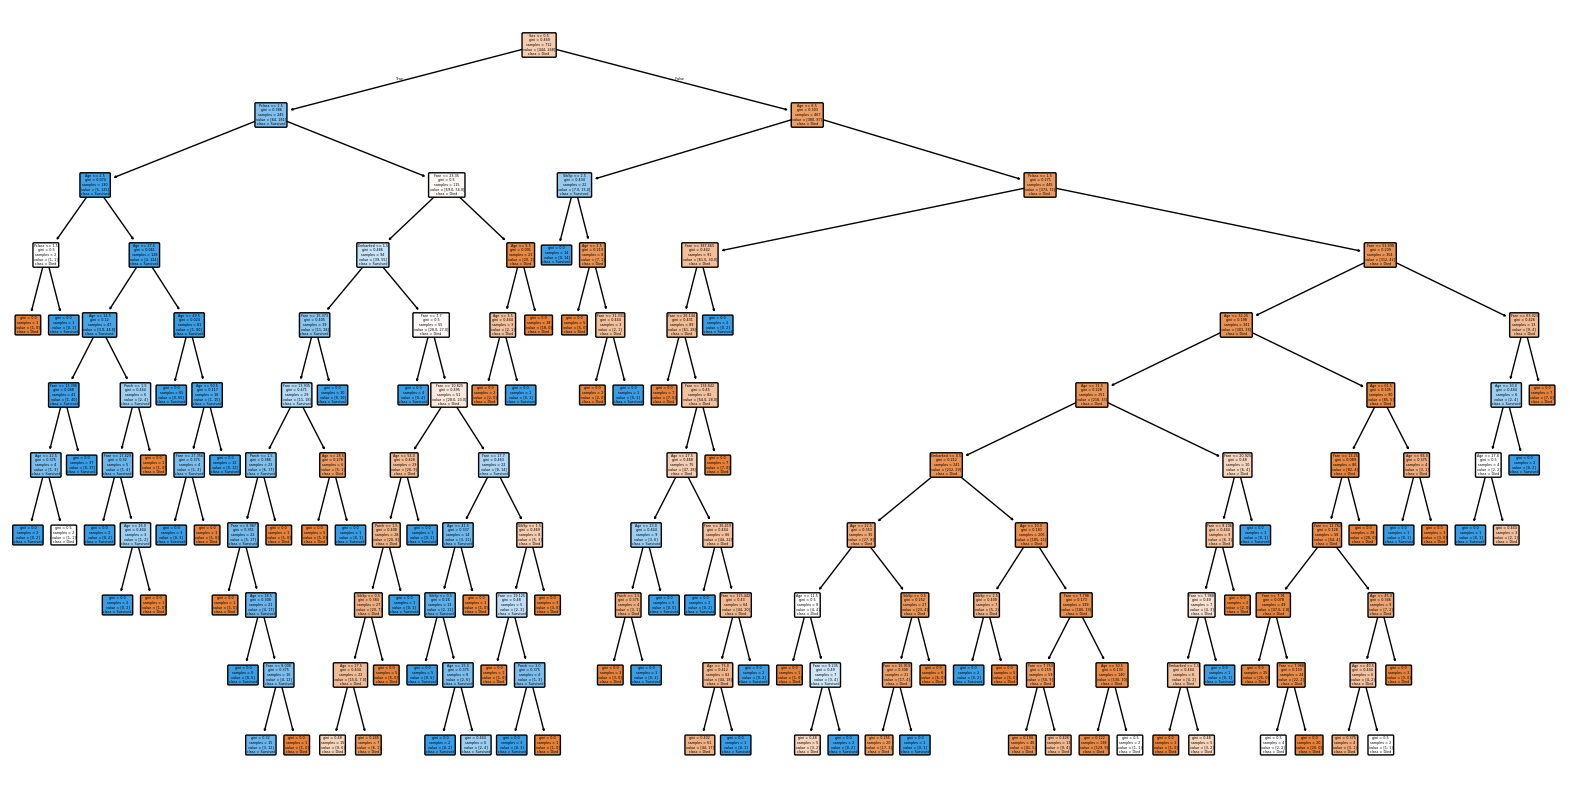

In [95]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
features = x.columns
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=features, class_names=['Died', 'Survived'], filled=True, rounded=True)
plt.show()

Feature Importance Scores:
    Feature  Importance
1       Sex    0.401502
5      Fare    0.203999
2       Age    0.155761
0    Pclass    0.142980
3     SibSp    0.055461
4     Parch    0.025650
6  Embarked    0.014647


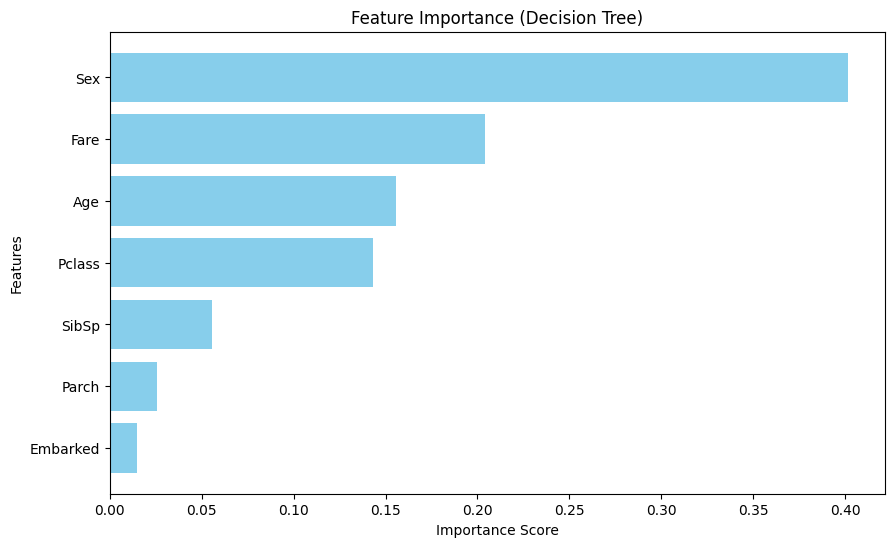

In [97]:
importances = clf.feature_importances_

# Create a DataFrame to view them nicely
feature_importance_df = pd.DataFrame({
'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance Scores:")
print(feature_importance_df)

# 5. Visualize Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance (Decision Tree)')
plt.gca().invert_yaxis() # Puts the most important feature at the top
plt.show()